#### Installations
ca prends plusieurs minutes



In [ ]:
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1,408 kB]
Fetched 1,66

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

import rtree

from shapely.geometry import Point
from shapely.ops import transform

from IPython.display import display

#### Données

In [ ]:
dpt = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"
reg = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson"

In [ ]:
df_dpt = gpd.read_file(dpt)
df_reg = gpd.read_file(reg)

In [ ]:
df_dpt.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."


In [ ]:
type(df_dpt)

geopandas.geodataframe.GeoDataFrame

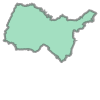

In [ ]:
df_dpt.loc[0, 'geometry']

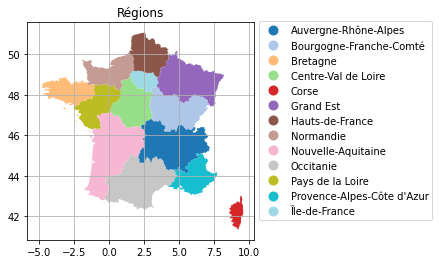

In [ ]:
# affichage simplifié à partir d'un geopandas GeoDataFrame

legend_param = {'loc':'upper left', 'bbox_to_anchor': (1, 1.03)}

df_reg.plot(column = 'nom',  cmap = 'tab20', legend = True, legend_kwds = legend_param)
plt.title('Régions')
plt.grid()
plt.show()

#### Quand on a pas de geojson, transformer les données


In [ ]:
path_us_cities = "https://raw.githubusercontent.com/kelvins/US-Cities-Database/master/csv/us_cities.csv"

# ici on 2 colonnes, latitude et longitude
df_usa_cities = pd.read_csv(path_us_cities)
df_usa_cities.head()

,ID,STATE_CODE,STATE_NAME,CITY,COUNTY,LATITUDE,LONGITUDE
0,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778
1,2,AK,Alaska,Akiachak,Bethel,60.891854,-161.392330
2,3,AK,Alaska,Akiak,Bethel,60.890632,-161.199325
3,4,AK,Alaska,Akutan,Aleutians East,54.143012,-165.785368
4,5,AK,Alaska,Alakanuk,Wade Hampton,62.746967,-164.602280


In [ ]:
# on crée de "vrais" points avec la geometry

df_usa_cities['geometry'] = df_usa_cities.apply(lambda x : Point(float(x.LONGITUDE), float(x.LATITUDE)), axis=1)

In [ ]:
df_usa_cities.head()

,ID,STATE_CODE,STATE_NAME,CITY,COUNTY,LATITUDE,LONGITUDE,geometry
0,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778,POINT (-161.207778 55.999722)
1,2,AK,Alaska,Akiachak,Bethel,60.891854,-161.392330,POINT (-161.39233 60.891854)
2,3,AK,Alaska,Akiak,Bethel,60.890632,-161.199325,POINT (-161.199325 60.890632)
3,4,AK,Alaska,Akutan,Aleutians East,54.143012,-165.785368,POINT (-165.785368 54.143012)
4,5,AK,Alaska,Alakanuk,Wade Hampton,62.746967,-164.602280,POINT (-164.60228 62.74696700000001)


In [ ]:
type(df_usa_cities)

pandas.core.frame.DataFrame

In [ ]:
# on créee un GeoDataFrame
df_usa_cities = gpd.GeoDataFrame(df_usa_cities, geometry = df_usa_cities['geometry'])
df_usa_cities.head(2)

,ID,STATE_CODE,STATE_NAME,CITY,COUNTY,LATITUDE,LONGITUDE,geometry
0,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778,POINT (-161.20778 55.99972)
1,2,AK,Alaska,Akiachak,Bethel,60.891854,-161.392330,POINT (-161.39233 60.89185)


In [ ]:
# on vérifier le type de la data frame

type(df_usa_cities)

geopandas.geodataframe.GeoDataFrame

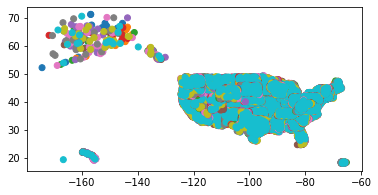

In [ ]:
df_usa_cities.plot(column = 'CITY')
plt.show()

#### Spatial join
exemple: combien y a t il de départements dans chaque région ?

In [ ]:
france_joinded = gpd.sjoin(df_reg, df_dpt, op='contains') # op = 'within' ou op = 'intersect' possibles aussi
france_joinded.head(10)

,code_left,nom_left,geometry,index_right,code_right,nom_right
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",91,91,Essonne
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",77,77,Seine-et-Marne
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",78,78,Yvelines
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",94,94,Val-de-Marne
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",92,92,Hauts-de-Seine
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",75,75,Paris
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",93,93,Seine-Saint-Denis
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",95,95,Val-d'Oise
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ...",28,28,Eure-et-Loir
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ...",36,36,Indre


In [ ]:
france_joinded_grouped = france_joinded[['nom_left', 'nom_right']].groupby('nom_left')

In [ ]:
france_joinded_grouped.agg('count').sort_values(by='nom_right', ascending = False)

,nom_right
nom_left,
Occitanie,13
Auvergne-Rhône-Alpes,12
Nouvelle-Aquitaine,12
Grand Est,10
Bourgogne-Franche-Comté,8
Île-de-France,8
Centre-Val de Loire,6
Provence-Alpes-Côte d'Azur,6
Hauts-de-France,5


#### Folium

In [ ]:
eiffel_tower = folium.Map(location = [48.8583736,2.2922926], zoom_start = 12)

display(eiffel_tower)

In [ ]:
df_reg.head()

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ..."
3,28,Normandie,"MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49..."
4,32,Hauts-de-France,"POLYGON ((4.14090 49.97876, 4.14407 49.97625, ..."


In [ ]:
df_reg[df_reg['nom'] == 'Hauts-de-France']

,code,nom,geometry
4,32,Hauts-de-France,"POLYGON ((4.14090 49.97876, 4.14407 49.97625, ..."


In [ ]:
centre_hdf = df_reg[df_reg['nom'] == 'Hauts-de-France'].geometry.centroid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
centre_hdf

4    POINT (2.77151 49.96926)
dtype: geometry

In [ ]:
coord_centre = [centre_hdf.y, centre_hdf.x]
coord_centre[1].values[0]

2.7715103428084786

In [ ]:
df_dpt[df_dpt['nom'] == 'Nord'].geometry

59    MULTIPOLYGON (((3.04040 50.15971, 3.04599 50.1...
Name: geometry, dtype: geometry

Incrustation

In [ ]:
hdf_map = folium.Map(location = [coord_centre[0].values[0], coord_centre[1].values[0]] , zoom_start = 7)

folium.GeoJson(df_dpt[df_dpt['nom'] == 'Nord'].geometry).add_to(hdf_map)

display(hdf_map)

#### Lycées dans les Hauts de France

In [ ]:
lyc_hdf  ="https://www.geo2france.fr/geoserver/cr_hdf/ows?request=GetFeature&service=WFS&version=1.1.0&typeName=lycee&outputFormat=json"
df_lyc_hdf = gpd.read_file(lyc_hdf)

In [ ]:
type(df_lyc_hdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
df_lyc_hdf.head(1)

,id,oid,uai,secteur,statut,etiquette,etab,nom_site_m,nom_site,tutelle,insee,commune,code_posta,adresse,bp,siret,noms1,noms2,geometry
0,lycee.1,433,0022172A,PUB,EXP,Micro-lycée de Saint-Quentin,Etablissement expérimental - Micro-lycée de Sa...,ETABLISSEMENT EXPERIMENTAL - MICRO-LYCÉE DE SA...,Etablissement expérimental - Micro-lycée de Sa...,EN,02722,SAINT-QUENTIN,02100,RUE GASTON BACHELARD,,,ETABLISSEMENT EXPERIMENTAL - MICRO-LYCÉE DE SA...,Etablissement expérimental - Micro-lycée de Sa...,POINT (722306.300 6972869.000)


In [ ]:
# le geocodage des lycées n'est pas le même que celui des régions/départements
# on doit donc convertir le crs (coordonate reference system)

df_lyc_hdf['geometry'] = df_lyc_hdf['geometry'].to_crs("EPSG:4326")

In [ ]:
df_lyc_hdf.head(1)

,id,oid,uai,secteur,statut,etiquette,etab,nom_site_m,nom_site,tutelle,insee,commune,code_posta,adresse,bp,siret,noms1,noms2,geometry
0,lycee.1,433,0022172A,PUB,EXP,Micro-lycée de Saint-Quentin,Etablissement expérimental - Micro-lycée de Sa...,ETABLISSEMENT EXPERIMENTAL - MICRO-LYCÉE DE SA...,Etablissement expérimental - Micro-lycée de Sa...,EN,02722,SAINT-QUENTIN,02100,RUE GASTON BACHELARD,,,ETABLISSEMENT EXPERIMENTAL - MICRO-LYCÉE DE SA...,Etablissement expérimental - Micro-lycée de Sa...,POINT (3.30995 49.85421)


In [ ]:
for row in df_lyc_hdf.iterrows():
  # on récupère la position du lycée
  location = [row[1].geometry.y, row[1].geometry.x]
  # on récupère son nom
  popup = (str(row[1].nom_site))
  # on ajoute le marker pour chaque lycée
  marker = folium.Marker(location = location, popup = popup)
  marker.add_to(hdf_map)

display(hdf_map)

#### Chlorepleth

avec geopandas
et folium


densité de lycées dans les différents départemetns des Hauts de France


In [ ]:
df_lyc = gpd.sjoin(df_dpt, df_lyc_hdf, op = 'contains')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:2154

  """Entry point for launching an IPython kernel.


In [ ]:
df_lyc[['nom', 'nom_site']].groupby('nom')

In [ ]:
df_nombre_lyc = df_lyc[['nom', 'nom_site']].groupby('nom').count().reset_index().rename(columns={"nom_site": "nombre_lycees"})

In [ ]:
df_nombre_lyc.head()

,nom,nombre_lycees
0,Aisne,46
1,Nord,180
2,Oise,58
3,Pas-de-Calais,90
4,Somme,54


In [ ]:
# surface en km²
df_dpt['surface_km²'] = df_dpt['geometry'].to_crs(epsg = 6933).map(lambda p: p.area / 10**6)

In [ ]:
df_dpt['surface']= df_dpt.geometry.area

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
df_dpt.head(2)

,code,nom,geometry,surface_km²,surface
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",5785.490115,0.673141
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...",7412.183698,0.921193


In [ ]:
df_ratio = pd.merge(df_dpt, df_nombre_lyc)
df_ratio.head()

,code,nom,geometry,surface_km²,surface,nombre_lycees
0,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...",7412.183698,0.921193,46
1,59,Nord,"MULTIPOLYGON (((3.04040 50.15971, 3.04599 50.1...",5750.846234,0.727875,180
2,60,Oise,"MULTIPOLYGON (((3.04449 49.22949, 3.04702 49.2...",5889.770365,0.729747,58
3,62,Pas-de-Calais,"POLYGON ((2.06771 51.00651, 2.06950 51.00606, ...",6694.405535,0.848113,90
4,80,Somme,"POLYGON ((1.38155 50.06577, 1.38439 50.06775, ...",6195.470314,0.776227,54


In [ ]:
df_ratio['densite'] = df_ratio.nombre_lycees / df_ratio['surface_km²']
df_ratio.head()

,code,nom,geometry,surface_km²,surface,nombre_lycees,densite
0,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...",7412.183698,0.921193,46,0.006206
1,59,Nord,"MULTIPOLYGON (((3.04040 50.15971, 3.04599 50.1...",5750.846234,0.727875,180,0.031300
2,60,Oise,"MULTIPOLYGON (((3.04449 49.22949, 3.04702 49.2...",5889.770365,0.729747,58,0.009848
3,62,Pas-de-Calais,"POLYGON ((2.06771 51.00651, 2.06950 51.00606, ...",6694.405535,0.848113,90,0.013444
4,80,Somme,"POLYGON ((1.38155 50.06577, 1.38439 50.06775, ...",6195.470314,0.776227,54,0.008716


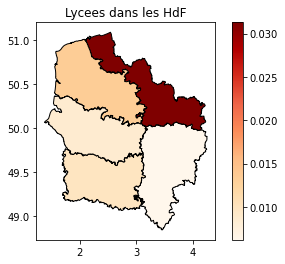

In [ ]:
df_ratio.plot(column = 'densite', cmap = 'OrRd', edgecolor = 'black',legend = True)
plt.title("Lycees dans les HdF")
plt.show()

In [ ]:
loc_hdf =  [coord_centre[0].values[0], coord_centre[1].values[0]]
hdf_map = folium.Map(location = loc_hdf, zoom_start = 7)

hdf_map.choropleth(
    geo_data=df_ratio,
    name='geometry',
    data=df_ratio,
    columns=['nom', 'densite'],
    key_on='feature.properties.nom',
    fill_color='Reds',
    fill_opacity=0.5,
    line_opacity=1.0,
    legend_name='Lycees dans les hauts de France'
)    

folium.LayerControl().add_to(hdf_map)



/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
df_ratio['center'] = df_ratio.geometry.centroid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
for row in df_ratio.iterrows():
  location = [row[1].center.y, row[1].center.x]
  popup = ('Departement:'+str(row[1].nom) +"; "+'Nombre lycees:'+str(row[1].nombre_lycees))
  marker = folium.Marker(location = location, popup = popup)
  marker.add_to(hdf_map)

In [ ]:
display(hdf_map)